# LinkedIn Posts Data Analysis
## Notebook 01: Data Cleaning and Validation

This notebook performs initial data loading, cleaning, and validation of the LinkedIn posts dataset.

### Objectives:
1. Load the raw JSON data
2. Identify and document missing data
3. Detect data inconsistencies
4. Clean and transform data
5. Create derived features
6. Export cleaned dataset for analysis

In [1]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import json
from pathlib import Path

# Import custom modules
from data_loader import load_and_prepare_data

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Data

In [2]:
# Load the dataset
data_path = "../dataset_linkedin-post_2025-11-23_06-22-48-536.json"
df = load_and_prepare_data(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}): {list(df.columns)}")

INFO:data_loader:Loading data from ../dataset_linkedin-post_2025-11-23_06-22-48-536.json
INFO:data_loader:Loaded 11227 posts
INFO:data_loader:Converting posts to DataFrame
INFO:data_loader:Created DataFrame with 11227 rows and 46 columns


Dataset loaded successfully!
Shape: (11227, 46)

Columns (46): ['urn', 'url', 'type', 'text', 'isActivity', 'timeSincePosted', 'shareUrn', 'postedAtISO', 'postedAtTimestamp', 'numLikes', 'numShares', 'numComments', 'canReact', 'canPostComments', 'canShare', 'commentingDisabled', 'rootShare', 'authorName', 'authorProfileId', 'authorType', 'authorHeadline', 'authorProfileUrl', 'authorProfilePicture', 'authorUrn', 'authorFollowersCount', 'has_images', 'has_video', 'has_article', 'has_document', 'has_poll', 'has_event', 'is_reshare', 'num_images', 'num_comments_fetched', 'num_reactions_fetched', 'num_attributes', 'activityDescription', 'shareAudience', 'allowedCommentersScope', 'inputUrl', 'author_firstName', 'author_lastName', 'author_fullName', 'author_occupation', 'author_id', 'author_publicId']


In [3]:
# Display first few rows
df.head()

,urn,url,type,text,isActivity,timeSincePosted,shareUrn,postedAtISO,postedAtTimestamp,numLikes,numShares,numComments,canReact,canPostComments,canShare,commentingDisabled,rootShare,authorName,authorProfileId,authorType,authorHeadline,authorProfileUrl,authorProfilePicture,authorUrn,authorFollowersCount,has_images,has_video,has_article,has_document,has_poll,has_event,is_reshare,num_images,num_comments_fetched,num_reactions_fetched,num_attributes,activityDescription,shareAudience,allowedCommentersScope,inputUrl,author_firstName,author_lastName,author_fullName,author_occupation,author_id,author_publicId
0,urn:li:activity:7397317909485637633,https://www.linkedin.com/posts/timothydraper_i...,image,I loved Brian Armstrong from the moment he wal...,False,2d,urn:li:share:7397317905568317440,2025-11-20T17:00:25.142Z,1763658025142,128,3,13,True,True,True,False,True,Tim Draper,timothydraper,Person,Funding the future first | Founder at Draper A...,https://www.linkedin.com/in/timothydraper?mini...,https://media.licdn.com/dms/image/v2/D5603AQHr...,urn:li:member:177619,NaN,True,False,False,False,False,False,False,1,0,0,4,None,PUBLIC,ALL,https://www.linkedin.com/in/timothydraper,Tim,Draper,Tim Draper,Funding the future first | Founder at Draper A...,177619,timothydraper
1,urn:li:activity:7397314179881263104,https://www.linkedin.com/posts/andytangvc_anot...,image,Another great demo day from Draper University!...,True,2d,urn:li:ugcPost:7397313732470722560,2025-11-20T16:45:35.935Z,1763657135935,195,7,14,True,True,True,False,True,Andy Tang,andytangvc,Person,"Partner, Draper Associates | Founding partner,...",https://www.linkedin.com/in/andytangvc?miniPro...,https://media.licdn.com/dms/image/v2/D5603AQF3...,urn:li:member:65972,NaN,True,False,False,False,False,False,False,3,0,0,9,Tim Draper reposted this,PUBLIC,ALL,https://www.linkedin.com/in/timothydraper,Andy,Tang,Andy Tang,"Partner, Draper Associates | Founding partner,...",65972,andytangvc
2,urn:li:activity:7396955452682563585,https://www.linkedin.com/posts/timothydraper_t...,image,Tom Williams came to us with no business plan....,False,3d,urn:li:share:7396955451696832512,2025-11-19T17:00:08.706Z,1763571608706,239,7,24,True,True,True,False,True,Tim Draper,timothydraper,Person,Funding the future first | Founder at Draper A...,https://www.linkedin.com/in/timothydraper?mini...,https://media.licdn.com/dms/image/v2/D5603AQHr...,urn:li:member:177619,NaN,True,False,False,False,False,False,False,1,0,0,0,None,PUBLIC,ALL,https://www.linkedin.com/in/timothydraper,Tim,Draper,Tim Draper,Funding the future first | Founder at Draper A...,177619,timothydraper
3,urn:li:activity:7396593064259051520,https://www.linkedin.com/posts/timothydraper_f...,image,Fresh off our big win with Twitch being bought...,False,4d,urn:li:share:7396593053609807873,2025-11-18T17:00:08.573Z,1763485208573,115,4,5,True,True,True,False,True,Tim Draper,timothydraper,Person,Funding the future first | Founder at Draper A...,https://www.linkedin.com/in/timothydraper?mini...,https://media.licdn.com/dms/image/v2/D5603AQHr...,urn:li:member:177619,NaN,True,False,False,False,False,False,False,1,0,0,4,None,PUBLIC,ALL,https://www.linkedin.com/in/timothydraper,Tim,Draper,Tim Draper,Funding the future first | Founder at Draper A...,177619,timothydraper
4,urn:li:activity:7396361475256180737,https://www.linkedin.com/posts/andytangvc_why-...,article,As a trained engineer (and recovering biology ...,True,5d,urn:li:share:7396184167715201024,2025-11-18T01:39:53.452Z,1763429993452,59,4,3,True,True,True,False,True,Andy Tang,andytangvc,Person,"Partner, Draper Associates | Founding partner,...",https://www.linkedin.com/in/andytangvc?miniPro...,https://media.licdn.com/dms/image/v2/D5603AQF3...,urn:li:member:65972,NaN,False,False,True,False,False,False,False,0,0,0,21,Tim Draper reposted this,PUBLIC,ALL,https://www.linkedin.com/in/timothydraper,Andy,Tang,Andy Tang,"Partner, Draper Associates | Founding partner,...",65972,andytangvc


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11227 entries, 0 to 11226
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   urn                     11227 non-null  object 
 1   url                     11227 non-null  object 
 2   type                    11158 non-null  object 
 3   text                    11213 non-null  object 
 4   isActivity              11227 non-null  bool   
 5   timeSincePosted         11227 non-null  object 
 6   shareUrn                11227 non-null  object 
 7   postedAtISO             11227 non-null  object 
 8   postedAtTimestamp       11227 non-null  int64  
 9   numLikes                11227 non-null  int64  
 10  numShares               11227 non-null  int64  
 11  numComments             11227 non-null  int64  
 12  canReact                11227 non-null  bool   
 13  canPostComments         11227 non-null  bool   
 14  canShare                11227 non-null

## 2. Data Quality Assessment

### 2.1 Missing Data Analysis

In [5]:
# Calculate missing data statistics
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
}).sort_values('Missing_Count', ascending=False)

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]

print(f"Columns with missing data: {len(missing_stats)}\n")
print(missing_stats)

Columns with missing data: 12

                                    Column  Missing_Count  Missing_Percent  \
authorFollowersCount  authorFollowersCount          10081            89.79   
activityDescription    activityDescription           7046            62.76   
author_publicId            author_publicId           1163            10.36   
author_occupation        author_occupation           1163            10.36   
author_id                        author_id           1163            10.36   
authorHeadline              authorHeadline           1146            10.21   
authorProfilePicture  authorProfilePicture            816             7.27   
type                                  type             69             0.61   
author_lastName            author_lastName             17             0.15   
author_firstName          author_firstName             17             0.15   
author_fullName            author_fullName             17             0.15   
text                             

INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\yjkim\AppData\Local\Temp\tmpod7lbteu.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\yjkim\AppData\Local\Temp\tmpjx5pmnj0.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\yjkim\AppData\Local\Temp\tmpjx5pmnj0
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/yjkim/AppData/Local/Temp/tmpod7lbteu/index.html
INFO:kaleido.kaleido:Waiting on all navigates
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:kaleido.kaleido:Got 132A
INFO:kaleido._kaleido_tab:Processing Missing_Data_by_Column.png
INFO:kaleido._kaleido_tab:Sending big command for Missing_Data_by_Column.png.
INFO:kaleido

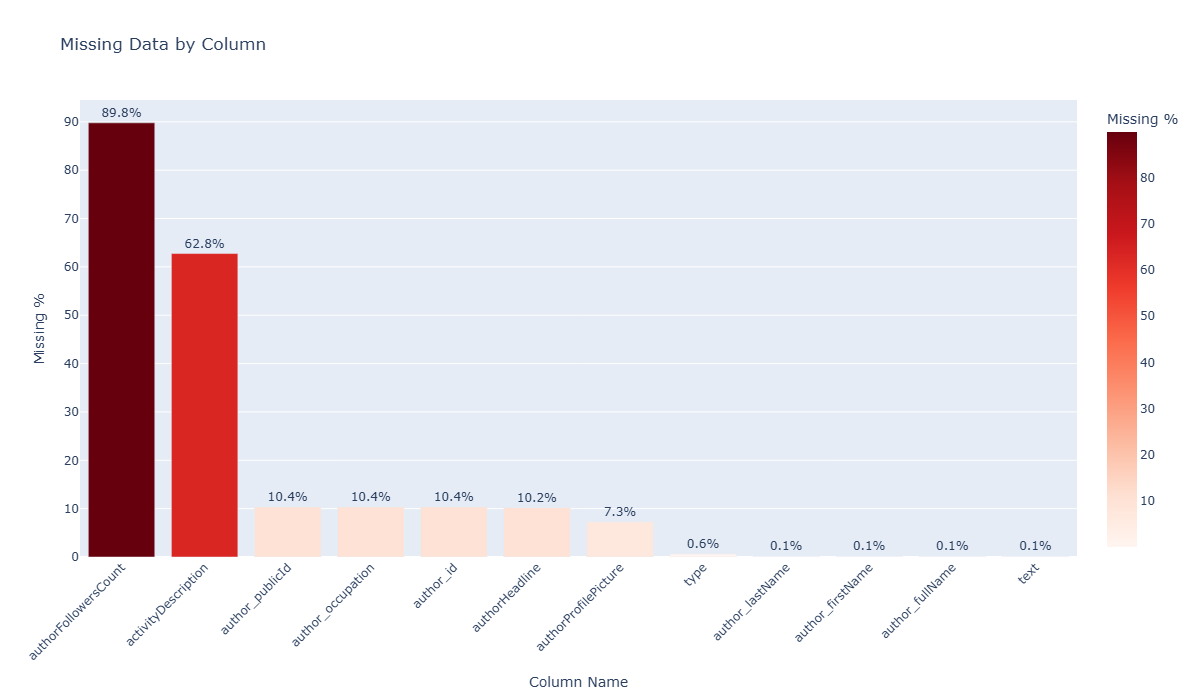

In [6]:
# Visualize missing data
fig = px.bar(
    missing_stats,
    x='Column',
    y='Missing_Percent',
    title='Missing Data by Column',
    labels={'Missing_Percent': 'Missing %', 'Column': 'Column Name'},
    text='Missing_Percent',
    color='Missing_Percent',
    color_continuous_scale='Reds'
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    showlegend=False
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print(f'Static image export failed: {e}')
    print('Install kaleido: pip install kaleido')
fig.write_html('../output/figures/missing_data_analysis.html')

### 2.2 Engagement Metrics Validation

In [7]:
# Check for negative or invalid engagement metrics
engagement_cols = ['numLikes', 'numShares', 'numComments']

print("Engagement Metrics Summary:\n")
for col in engagement_cols:
    print(f"{col}:")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Negative values: {(df[col] < 0).sum()}")
    print(f"  Zero values: {(df[col] == 0).sum()}")
    print()

Engagement Metrics Summary:

numLikes:
  Min: 0
  Max: 20685
  Mean: 287.19
  Median: 100.00
  Negative values: 0
  Zero values: 3

numShares:
  Min: 0
  Max: 4235
  Mean: 13.64
  Median: 3.00
  Negative values: 0
  Zero values: 2473

numComments:
  Min: 0
  Max: 9556
  Mean: 26.84
  Median: 7.00
  Negative values: 0
  Zero values: 1306



In [8]:
# Check for posts with zero engagement across all metrics
zero_engagement = df[(df['numLikes'] == 0) & (df['numShares'] == 0) & (df['numComments'] == 0)]
print(f"Posts with zero engagement across all metrics: {len(zero_engagement)} ({len(zero_engagement)/len(df)*100:.2f}%)")

if len(zero_engagement) > 0:
    print(f"\nSample of zero-engagement posts:")
    print(zero_engagement[['authorName', 'text', 'type', 'postedAtISO']].head())

Posts with zero engagement across all metrics: 3 (0.03%)

Sample of zero-engagement posts:
                  authorName  \
6674                  Ed Sim   
7083   Wouter van den Brande   
10679                 Ed Sim   

                                                    text  type  \
6674   👇🏼 why you need Hypernative real-time security...  text   
7083                                  See you at HumanX!  text   
10679  Amazing year for Hypernative! Who's ready to s...  text   

                    postedAtISO  
6674   2025-09-12T13:55:03.861Z  
7083   2025-03-10T20:46:45.268Z  
10679  2025-01-01T18:26:33.789Z  


### 2.3 Duplicate Detection

In [9]:
# Check for duplicate URNs
duplicate_urns = df[df.duplicated(subset=['urn'], keep=False)]
print(f"Duplicate URNs found: {len(duplicate_urns)}")

if len(duplicate_urns) > 0:
    print(f"\nDuplicate posts:")
    print(duplicate_urns[['urn', 'authorName', 'text']].head(10))

Duplicate URNs found: 0


In [10]:
# Check for duplicate share URNs
duplicate_share_urns = df[df.duplicated(subset=['shareUrn'], keep=False)]
print(f"Duplicate Share URNs found: {len(duplicate_share_urns)}")

Duplicate Share URNs found: 1653


### 2.4 Timestamp Validation

In [11]:
# Parse timestamps
df['postedAt'] = pd.to_datetime(df['postedAtISO'])

print("Timestamp Range:")
print(f"  Earliest: {df['postedAt'].min()}")
print(f"  Latest: {df['postedAt'].max()}")
print(f"  Date Range: {(df['postedAt'].max() - df['postedAt'].min()).days} days")

# Check for future dates
now = pd.Timestamp.now(tz='UTC')
future_posts = df[df['postedAt'] > now]
print(f"\nPosts with future dates: {len(future_posts)}")

Timestamp Range:
  Earliest: 2024-11-22 00:27:05.461000+00:00
  Latest: 2025-11-22 22:22:05.035000+00:00
  Date Range: 365 days

Posts with future dates: 0


### 2.5 Content Type Validation

In [12]:
# Check post types
print("Post Type Distribution:")
type_counts = df['type'].value_counts(dropna=False)
print(type_counts)
print(f"\nMissing type: {df['type'].isnull().sum()} posts")

# Content flags summary
content_flags = ['has_images', 'has_video', 'has_article', 'has_document', 'has_poll', 'has_event', 'is_reshare']
print("\nContent Type Flags:")
for flag in content_flags:
    count = df[flag].sum()
    pct = count / len(df) * 100
    print(f"  {flag}: {count} ({pct:.1f}%)")

Post Type Distribution:
type
image            3970
text             3828
article          1625
linkedinVideo    1620
document           84
None               69
poll               26
linkedinEvent       5
Name: count, dtype: int64

Missing type: 69 posts

Content Type Flags:
  has_images: 3970 (35.4%)
  has_video: 1620 (14.4%)
  has_article: 1625 (14.5%)
  has_document: 84 (0.7%)
  has_poll: 26 (0.2%)
  has_event: 5 (0.0%)
  is_reshare: 2405 (21.4%)


INFO:choreographer.utils._tmpfile:TemporaryDirectory.cleanup() worked.
INFO:choreographer.utils._tmpfile:shutil.rmtree worked.


INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
INFO:choreographer.browsers.chromium:Found chromium path: C:\Program Files\Google\Chrome\Application\chrome.exe
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\yjkim\AppData\Local\Temp\tmpzs3nxrwx.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: C:\Users\yjkim\AppData\Local\Temp\tmp_qetz8xa.
INFO:choreographer.browsers.chromium:Temporary directory at: C:\Users\yjkim\AppData\Local\Temp\tmp_qetz8xa
INFO:kaleido.kaleido:Conforming 1 to file:///C:/Users/yjkim/AppData/Local/Temp/tmpzs3nxrwx/index.html
INFO:kaleido.kaleido:Waiting on all navigates
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:kaleido.kaleido:Got E583
INFO:kaleido._kaleido_tab:Processing Content_Type_Distribution.png
INFO:kaleido._kaleido_tab:Sending big command for Content_Type_Distribution.png.
INFO:k

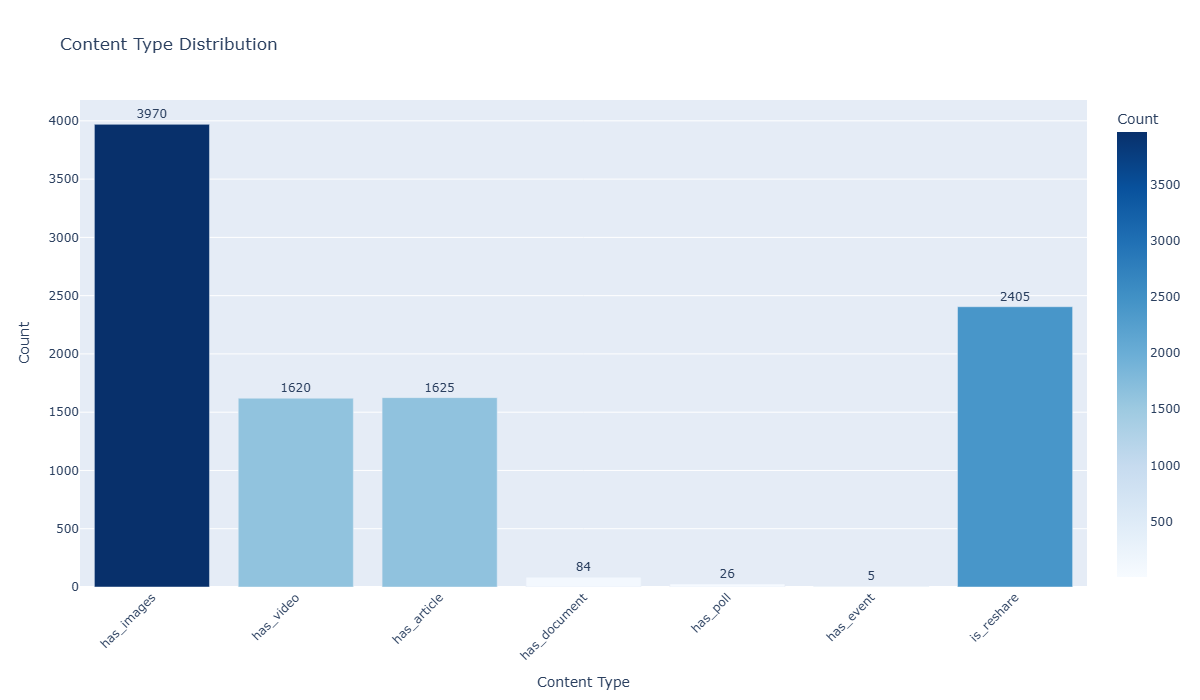

In [13]:
# Visualize content type distribution
content_summary = pd.DataFrame({
    'Content Type': content_flags,
    'Count': [df[flag].sum() for flag in content_flags]
})

fig = px.bar(
    content_summary,
    x='Content Type',
    y='Count',
    title='Content Type Distribution',
    text='Count',
    color='Count',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=500, showlegend=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format='png', width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print(f'Static image export failed: {e}')
    print('Install kaleido: pip install kaleido')
fig.write_html('../output/figures/content_type_distribution.html')

### 2.6 Author Data Quality

In [14]:
# Check author fields
print("Author Data Completeness:")
author_fields = ['authorName', 'authorProfileId', 'authorHeadline', 'authorFollowersCount', 'authorType']
for field in author_fields:
    missing = df[field].isnull().sum()
    pct = missing / len(df) * 100
    print(f"  {field}: {missing} missing ({pct:.2f}%)")

# Follower count statistics
print(f"\nFollower Count Statistics:")
print(f"  Available: {df['authorFollowersCount'].notna().sum()} posts")
print(f"  Missing: {df['authorFollowersCount'].isna().sum()} posts")
if df['authorFollowersCount'].notna().sum() > 0:
    print(f"  Min: {df['authorFollowersCount'].min():.0f}")
    print(f"  Max: {df['authorFollowersCount'].max():.0f}")
    print(f"  Mean: {df['authorFollowersCount'].mean():.0f}")
    print(f"  Median: {df['authorFollowersCount'].median():.0f}")

Author Data Completeness:
  authorName: 0 missing (0.00%)
  authorProfileId: 0 missing (0.00%)
  authorHeadline: 1146 missing (10.21%)
  authorFollowersCount: 10081 missing (89.79%)
  authorType: 0 missing (0.00%)

Follower Count Statistics:
  Available: 1146 posts
  Missing: 10081 posts
  Min: 34
  Max: 19371999
  Mean: 256474
  Median: 29949


## 3. Data Cleaning

### 3.1 Handle Missing Text

In [15]:
# Check posts with missing text
missing_text = df[df['text'].isnull()]
print(f"Posts with missing text: {len(missing_text)}")

if len(missing_text) > 0:
    print(f"\nSample of posts with missing text:")
    print(missing_text[['type', 'has_images', 'has_video', 'has_article', 'numLikes']].head())

# Fill missing text with empty string
df['text'] = df['text'].fillna('')
print(f"\nFilled missing text with empty strings")

Posts with missing text: 14

Sample of posts with missing text:
               type  has_images  has_video  has_article  numLikes
772           image        True      False        False       906
791            None       False      False        False       127
857         article       False      False         True      6256
1558           None       False      False        False       127
2390  linkedinVideo       False       True        False        28

Filled missing text with empty strings


### 3.2 Remove Duplicates

In [16]:
# Remove duplicate URNs (keep first occurrence)
before_count = len(df)
df = df.drop_duplicates(subset=['urn'], keep='first')
after_count = len(df)
removed = before_count - after_count

print(f"Removed {removed} duplicate posts")
print(f"Remaining posts: {after_count}")

Removed 0 duplicate posts
Remaining posts: 11227


## 4. Feature Engineering

### 4.1 Text Features

In [17]:
# Calculate text length
df['text_length'] = df['text'].str.len()

# Count words
df['word_count'] = df['text'].str.split().str.len()
df['word_count'] = df['word_count'].fillna(0).astype(int)

# Count lines/paragraphs
df['line_count'] = df['text'].str.count('\n') + 1
df['line_count'] = df['line_count'].fillna(1).astype(int)

# Detect questions
df['has_question'] = df['text'].str.contains(r'\?', regex=True, na=False)

# Detect hashtags
df['has_hashtag'] = df['text'].str.contains(r'#\w+', regex=True, na=False)
df['hashtag_count'] = df['text'].str.count(r'#\w+')

# Detect URLs
df['has_url'] = df['text'].str.contains(r'https?://', regex=True, na=False)
df['url_count'] = df['text'].str.count(r'https?://')

# Detect emojis (basic pattern)
emoji_pattern = r'[😀-🙏🌀-🗿🚀-🛿]'
df['has_emoji'] = df['text'].str.contains(emoji_pattern, regex=True, na=False)
df['emoji_count'] = df['text'].str.count(emoji_pattern)

print("Text features created:")
print(f"  text_length: min={df['text_length'].min()}, max={df['text_length'].max()}, mean={df['text_length'].mean():.1f}")
print(f"  word_count: min={df['word_count'].min()}, max={df['word_count'].max()}, mean={df['word_count'].mean():.1f}")
print(f"  has_question: {df['has_question'].sum()} posts ({df['has_question'].sum()/len(df)*100:.1f}%)")
print(f"  has_hashtag: {df['has_hashtag'].sum()} posts ({df['has_hashtag'].sum()/len(df)*100:.1f}%)")
print(f"  has_url: {df['has_url'].sum()} posts ({df['has_url'].sum()/len(df)*100:.1f}%)")
print(f"  has_emoji: {df['has_emoji'].sum()} posts ({df['has_emoji'].sum()/len(df)*100:.1f}%)")

Text features created:
  text_length: min=0, max=3000, mean=714.1
  word_count: min=0, max=572, mean=115.7
  has_question: 2149 posts (19.1%)
  has_hashtag: 1902 posts (16.9%)
  has_url: 2994 posts (26.7%)
  has_emoji: 3186 posts (28.4%)


### 4.2 Engagement Features

In [18]:
# Total engagement
df['total_engagement'] = df['numLikes'] + df['numShares'] + df['numComments']

# Weighted engagement score (likes=1, comments=2, shares=3)
df['engagement_score'] = df['numLikes'] + (df['numComments'] * 2) + (df['numShares'] * 3)

# Engagement ratios
df['comment_to_like_ratio'] = np.where(
    df['numLikes'] > 0,
    df['numComments'] / df['numLikes'],
    0
)

df['share_to_like_ratio'] = np.where(
    df['numLikes'] > 0,
    df['numShares'] / df['numLikes'],
    0
)

# Engagement per follower (if available)
df['engagement_per_follower'] = np.where(
    df['authorFollowersCount'].notna() & (df['authorFollowersCount'] > 0),
    df['total_engagement'] / df['authorFollowersCount'],
    np.nan
)

print("Engagement features created:")
print(f"  total_engagement: mean={df['total_engagement'].mean():.1f}, median={df['total_engagement'].median():.1f}")
print(f"  engagement_score: mean={df['engagement_score'].mean():.1f}, median={df['engagement_score'].median():.1f}")
print(f"  comment_to_like_ratio: mean={df['comment_to_like_ratio'].mean():.3f}")
print(f"  share_to_like_ratio: mean={df['share_to_like_ratio'].mean():.3f}")

Engagement features created:
  total_engagement: mean=327.7, median=115.0
  engagement_score: mean=381.8, median=133.0
  comment_to_like_ratio: mean=0.102
  share_to_like_ratio: mean=0.047


### 4.3 Temporal Features

**Important Note on Timezone**: All timestamps in this dataset are in **UTC (Coordinated Universal Time)**. The temporal features created below (hour, day, time of day) represent when posts entered the LinkedIn system in UTC, not the poster's local time. We do not have individual timezone information for each author, so all time-based analyses reflect UTC patterns.

In [19]:
# Extract temporal features (all in UTC)
df['post_year'] = df['postedAt'].dt.year
df['post_month'] = df['postedAt'].dt.month
df['post_day'] = df['postedAt'].dt.day
df['post_hour'] = df['postedAt'].dt.hour  # UTC hour (0-23)
df['post_dayofweek'] = df['postedAt'].dt.dayofweek  # 0=Monday, 6=Sunday
df['post_dayname'] = df['postedAt'].dt.day_name()
df['post_quarter'] = df['postedAt'].dt.quarter

# Is weekend
df['is_weekend'] = df['post_dayofweek'].isin([5, 6])

# Time of day categories (based on UTC)
def categorize_time_of_day(hour):
    """Categorize hour into time of day (UTC-based)"""
    if 6 <= hour < 12:
        return 'Morning (UTC)'
    elif 12 <= hour < 18:
        return 'Afternoon (UTC)'
    elif 18 <= hour < 22:
        return 'Evening (UTC)'
    else:
        return 'Night (UTC)'

df['time_of_day'] = df['post_hour'].apply(categorize_time_of_day)

print("Temporal features created (all times in UTC):")
print(f"\nDay of week distribution:")
print(df['post_dayname'].value_counts().sort_index())
print(f"\nTime of day distribution (UTC):")
print(df['time_of_day'].value_counts())
print(f"\nWeekend posts: {df['is_weekend'].sum()} ({df['is_weekend'].sum()/len(df)*100:.1f}%)")

Temporal features created (all times in UTC):

Day of week distribution:
post_dayname
Friday       1584
Monday       1608
Saturday      615
Sunday        403
Thursday     2269
Tuesday      2417
Wednesday    2331
Name: count, dtype: int64

Time of day distribution (UTC):
time_of_day
Afternoon (UTC)    5258
Evening (UTC)      2736
Night (UTC)        2278
Morning (UTC)       955
Name: count, dtype: int64

Weekend posts: 1018 (9.1%)


### 4.4 Post Length Categories

In [20]:
# Categorize post length
def categorize_post_length(length):
    if length == 0:
        return 'Empty'
    elif length < 100:
        return 'Very Short'
    elif length < 300:
        return 'Short'
    elif length < 700:
        return 'Medium'
    elif length < 1500:
        return 'Long'
    else:
        return 'Very Long'

df['length_category'] = df['text_length'].apply(categorize_post_length)

print("Post length categories:")
print(df['length_category'].value_counts())

Post length categories:
length_category
Medium        3383
Long          3005
Short         2631
Very Long     1320
Very Short     874
Empty           14
Name: count, dtype: int64


### 4.5 Content Type Summary

In [21]:
# Create a primary content type field
def get_primary_content_type(row):
    if row['is_reshare']:
        return 'Reshare'
    elif row['has_video']:
        return 'Video'
    elif row['has_article']:
        return 'Article'
    elif row['has_images']:
        return 'Image'
    elif row['has_poll']:
        return 'Poll'
    elif row['has_document']:
        return 'Document'
    elif row['has_event']:
        return 'Event'
    elif row['text_length'] > 0:
        return 'Text Only'
    else:
        return 'Unknown'

df['primary_content_type'] = df.apply(get_primary_content_type, axis=1)

print("Primary content type distribution:")
print(df['primary_content_type'].value_counts())

Primary content type distribution:
primary_content_type
Image        3970
Reshare      2405
Article      1625
Video        1620
Text Only    1489
Document       84
Poll           26
Event           5
Unknown         3
Name: count, dtype: int64


## 5. Data Quality Summary Report

In [22]:
# Create comprehensive data quality report
quality_report = {
    'Total Posts': len(df),
    'Total Columns': len(df.columns),
    'Date Range': f"{df['postedAt'].min()} to {df['postedAt'].max()}",
    'Duplicates Removed': removed,
    'Posts with Missing Text': len(missing_text),
    'Posts with Zero Engagement': len(zero_engagement),
    'Columns with Missing Data': len(missing_stats),
    'Posts with Follower Count': df['authorFollowersCount'].notna().sum(),
}

print("="*60)
print("DATA QUALITY SUMMARY")
print("="*60)
for key, value in quality_report.items():
    print(f"{key:.<40} {value}")
print("="*60)

DATA QUALITY SUMMARY
Total Posts............................. 11227
Total Columns........................... 73
Date Range.............................. 2024-11-22 00:27:05.461000+00:00 to 2025-11-22 22:22:05.035000+00:00
Duplicates Removed...................... 0
Posts with Missing Text................. 14
Posts with Zero Engagement.............. 3
Columns with Missing Data............... 12
Posts with Follower Count............... 1146


## 6. Export Cleaned Dataset

In [23]:
# Save cleaned dataset
output_path = '../output/tables/linkedin_posts_cleaned.csv'
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"Cleaned dataset saved to: {output_path}")

# Save data quality report
quality_report_df = pd.DataFrame(list(quality_report.items()), columns=['Metric', 'Value'])
quality_report_df.to_csv('../output/tables/data_quality_report.csv', index=False)
print(f"Data quality report saved to: ../output/tables/data_quality_report.csv")

# Save missing data statistics
if len(missing_stats) > 0:
    missing_stats.to_csv('../output/tables/missing_data_stats.csv', index=False)
    print(f"Missing data statistics saved to: ../output/tables/missing_data_stats.csv")

Cleaned dataset saved to: ../output/tables/linkedin_posts_cleaned.csv
Data quality report saved to: ../output/tables/data_quality_report.csv
Missing data statistics saved to: ../output/tables/missing_data_stats.csv


In [24]:
# Display final dataset info
print("\nFinal Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nNew Features Created:")
new_features = [
    'text_length', 'word_count', 'line_count', 'has_question', 'has_hashtag', 'hashtag_count',
    'has_url', 'url_count', 'has_emoji', 'emoji_count', 'total_engagement', 'engagement_score',
    'comment_to_like_ratio', 'share_to_like_ratio', 'engagement_per_follower',
    'post_year', 'post_month', 'post_day', 'post_hour', 'post_dayofweek', 'post_dayname',
    'post_quarter', 'is_weekend', 'time_of_day', 'length_category', 'primary_content_type'
]
print(new_features)
print(f"\nTotal new features: {len(new_features)}")


Final Dataset Information:
Shape: (11227, 73)

New Features Created:
['text_length', 'word_count', 'line_count', 'has_question', 'has_hashtag', 'hashtag_count', 'has_url', 'url_count', 'has_emoji', 'emoji_count', 'total_engagement', 'engagement_score', 'comment_to_like_ratio', 'share_to_like_ratio', 'engagement_per_follower', 'post_year', 'post_month', 'post_day', 'post_hour', 'post_dayofweek', 'post_dayname', 'post_quarter', 'is_weekend', 'time_of_day', 'length_category', 'primary_content_type']

Total new features: 26
